<a href="https://colab.research.google.com/github/LuciaSS27/Proyecto-Datos/blob/main/Proyecto_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **TRABAJO FINAL DATOS**



In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab
from sklearn.preprocessing import PolynomialFeatures
import scipy.io

**1. Análisis exploratorio del conjunto de datos**

Carga de datos

In [ ]:
data = pd.read_csv('politicES_phase_2_test_codalab.csv')
print("Número de instancias:")
print(data.shape[0])
print("Número de variables:")
print(data.shape[1])

Número de instancias
43760
Número de variables
6


In [ ]:
print("Variables:")
print(data[:0])

Variables:
Empty DataFrame
Columns: [label, gender, profession, ideology_binary, ideology_multiclass, tweet]
Index: []


In [ ]:
print(data.iloc[1772].values)

['0c92efbe64110f10ba794603824cd186' 'male' 'politician' 'left'
 'moderate_left'
 '⚓ Presentaré, mañana en la UE, la estrategia para consolidar la [HASHTAG] como sistema sostenible de producción de . ⚓ Objetivos:. 🔹 Fortalecimiento de las organizaciones de productores. 🔹 Bienestar animal. 🔹 Incremento de mujeres en esta actividad']


In [ ]:
print(data.isnull().any())

label                  False
gender                 False
profession             False
ideology_binary        False
ideology_multiclass    False
tweet                  False
dtype: bool


Estadística de los datos

30480


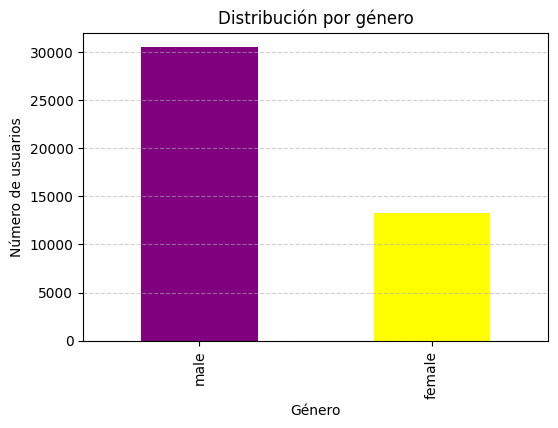

In [ ]:
#Género
gender = data['gender']
count= data['gender'].value_counts()
print(count.male)
#Gráfica
plt.figure(figsize=(6,4))
count.plot(kind='bar', color=['purple', 'yellow'])

plt.title("Distribución por género")
plt.xlabel("Género")
plt.ylabel("Número de usuarios")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()